Principal Component Analysis (PCA)

In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('drive/MyDrive/dataset/anime.csv')
data = data.drop(['Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1','MAL_ID'], axis=1)
mask = data['Score'] == 'Unknown'
data = data[~mask]
data.head()

,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,...,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,...,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",...,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,...,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",...,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",...,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394


In [ ]:
data.shape

(12421, 24)

In [ ]:
# features and target
df = data.drop('Score',axis=1)
y = data['Score']


In [ ]:
# Filter null values
for col in df.columns:
  df[col]=df[col].fillna(df[col].mode()[0])


# Label encoding
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
  le=LabelEncoder();
  df[col] = le.fit_transform(df[col])
df.head()


,Name,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,...,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,1963,28,971,3550,5,86,823,87,473,99,...,3,2056,33,9086,1518,3547,7660,2904,2938,6841
1,1965,742,973,3552,0,0,8676,157,2703,199,...,3,1153,390,8606,792,2117,7304,1385,720,6201
2,11281,1322,5253,4994,5,86,135,87,3322,108,...,2,1953,162,8924,1397,3294,7505,2824,2688,6725
3,11825,1243,5530,1339,5,86,4465,138,2876,99,...,2,1823,1056,7665,514,2150,6105,2125,2007,5731
4,1344,1946,519,7188,5,128,9101,39,2888,207,...,1,2739,2988,4891,18,636,3668,741,924,2595


In [ ]:
# Standard Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)
scaled_data.shape

(12421, 23)

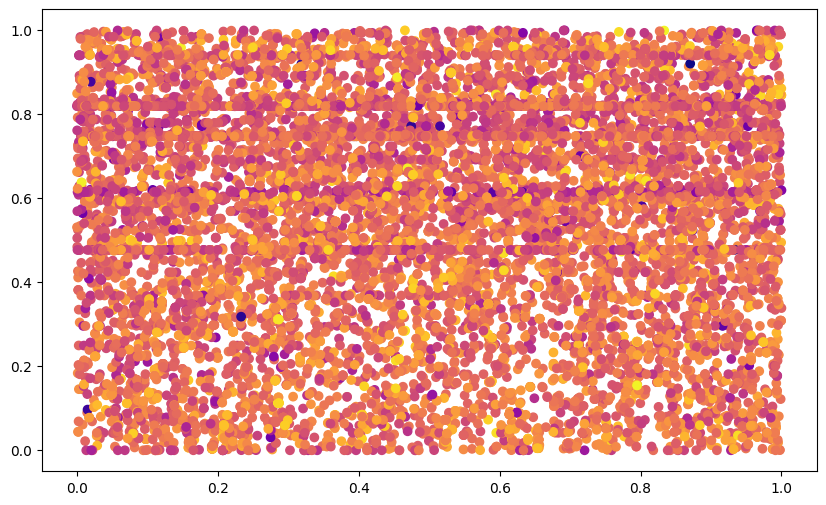

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.scatter(scaled_data[:,0], scaled_data[:,1], c = [data['Score']], cmap='plasma')

In [ ]:
# visualizing the distributions and relationships

# import seaborn as sns

# sns.pairplot(data,hue = "Score")
# plt.show()
# plt.figure(figsize=(12,8))

<ipython-input-187-adb82b7120e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


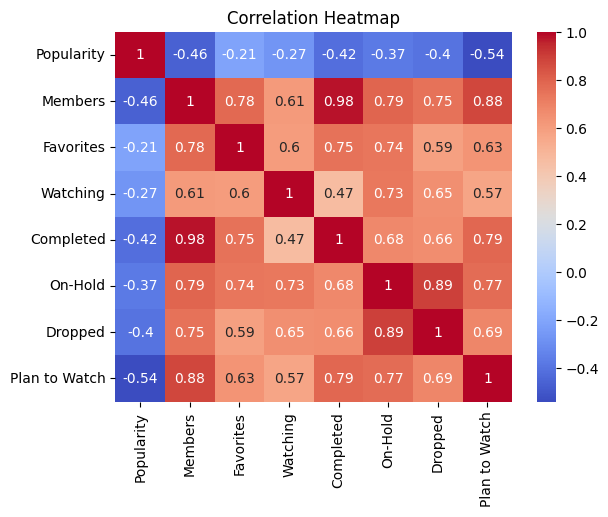

In [ ]:
# Heatmap
corr = data.corr()
sns.heatmap(corr,annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 42)



In [ ]:
# Train (Logistic Regression)
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train, y_train)


RandomForestRegressor()

In [ ]:
y_pred = model.predict(x_test)
score_comparison = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})

In [ ]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
test_score = model.score(x_test,y_test)

0.9880439745004252
0.9292923373615742


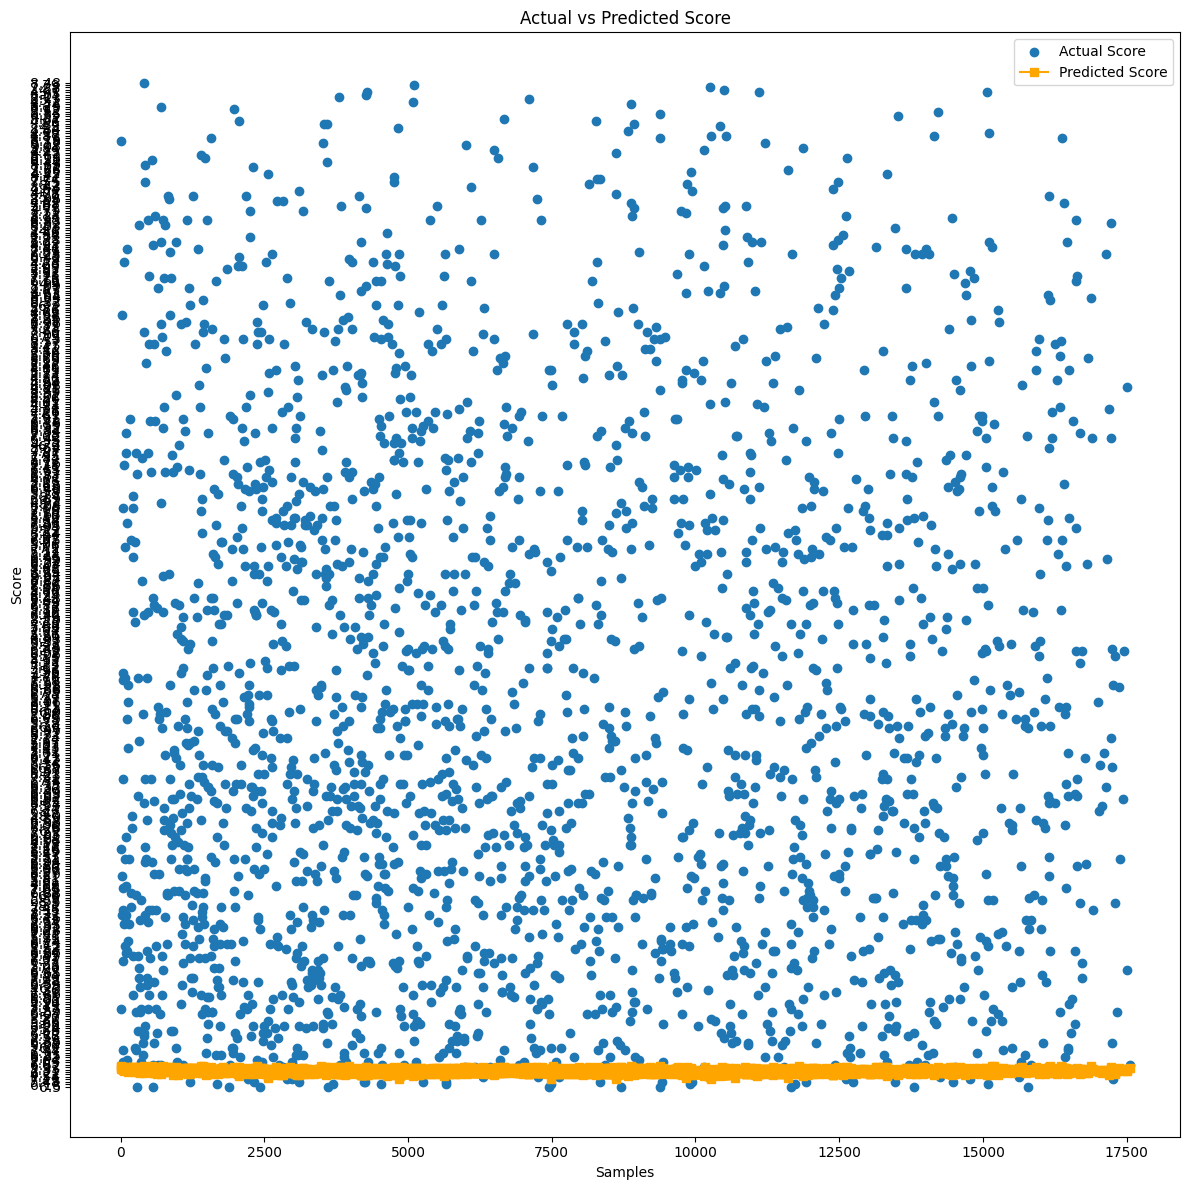

In [ ]:
plt.figure(figsize = (12,12))
plt.title("Actual vs Predicted Score")
plt.scatter(score_comparison.index, score_comparison['Actual Score'],label = "Actual Score", marker = 'o')
plt.plot(score_comparison.index, score_comparison["Predicted Score"], label = "Predicted Score", linestyle = '-', marker = 's', color="orange")
plt.xlabel("Samples")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
x_test.shape

(2485, 23)

In [ ]:
# PCA
from sklearn.decomposition import PCA

feature_count = data.columns.shape[0]

pca = PCA(0.95) # PCA(0.95)
pca.fit(df)

x_pca  = pca.transform(df)

x_pca.shape


(12421, 7)

In [ ]:
# Standard Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_pca)

scaled_pca = scaler.transform(x_pca)
scaled_pca.shape

(12421, 7)

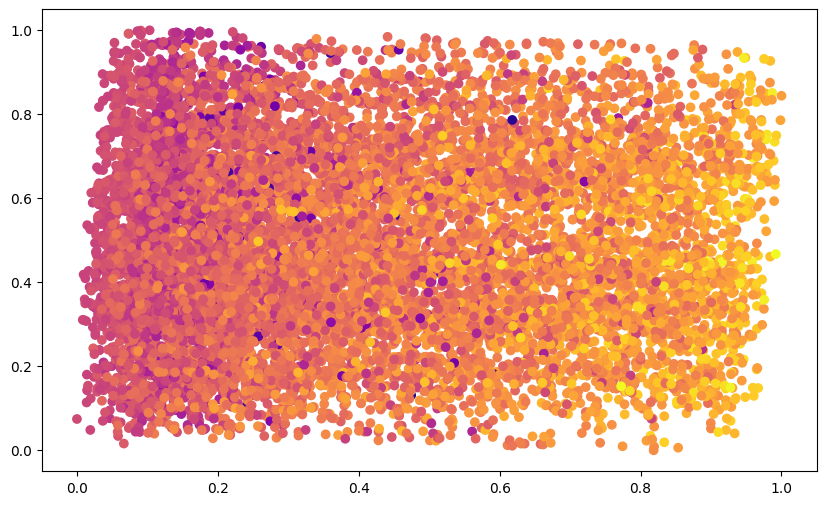

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.scatter(scaled_pca[:,0], scaled_pca[:,1], c = [data['Score']], cmap='plasma')

In [ ]:
# # visualizing the distributions and relationships

# import seaborn as sns

# sns.pairplot(data,hue = "Score")
# plt.show()
# plt.figure(figsize=(12,8))

In [ ]:
# Split PCA data
from sklearn.model_selection import train_test_split
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(scaled_pca, y, test_size = 0.2, random_state = 42)

In [ ]:
# Train Model (after PCA)
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train_pca, y_train_pca)

RandomForestRegressor()

In [ ]:
y_pred_pca = model.predict(x_test_pca)
score_comparison = pd.DataFrame({'Actual Score': y_test_pca, 'Predicted Score': y_pred_pca})

In [ ]:
print(model.score(x_train_pca,y_train_pca))
print(model.score(x_test_pca,y_test_pca))
test_score_pca = model.score(x_test_pca,y_test_pca)

0.9622379470365843
0.7464575767382582


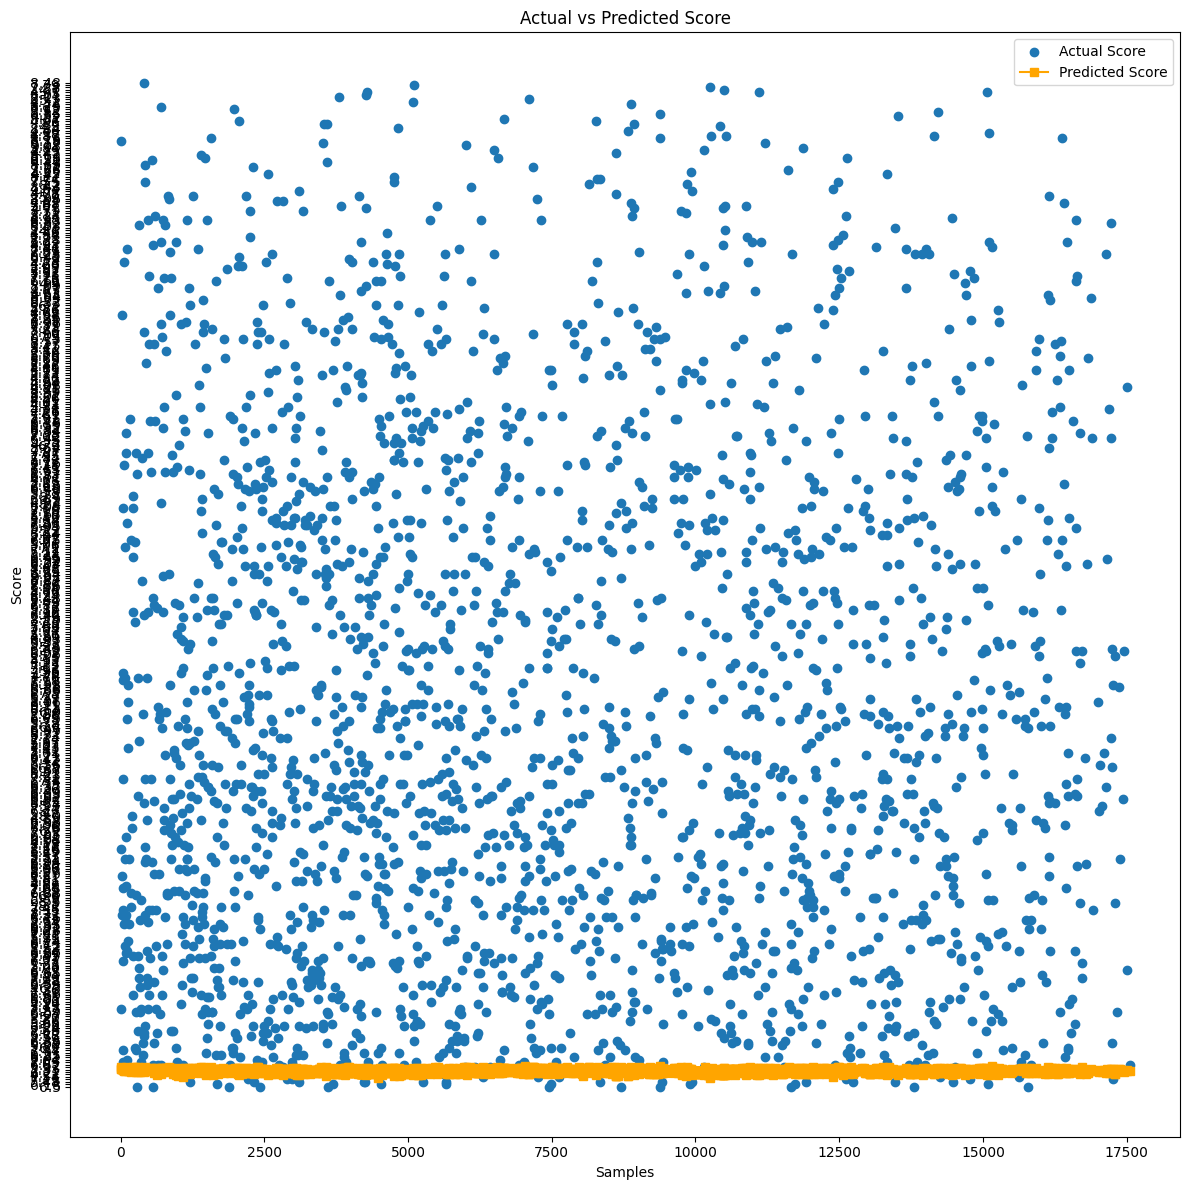

In [ ]:
plt.figure(figsize = (12,12))
plt.title("Actual vs Predicted Score")
plt.scatter(score_comparison.index, score_comparison['Actual Score'],label = "Actual Score", marker = 'o')
plt.plot(score_comparison.index, score_comparison["Predicted Score"], label = "Predicted Score", linestyle = '-', marker = 's', color="orange")
plt.xlabel("Samples")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()

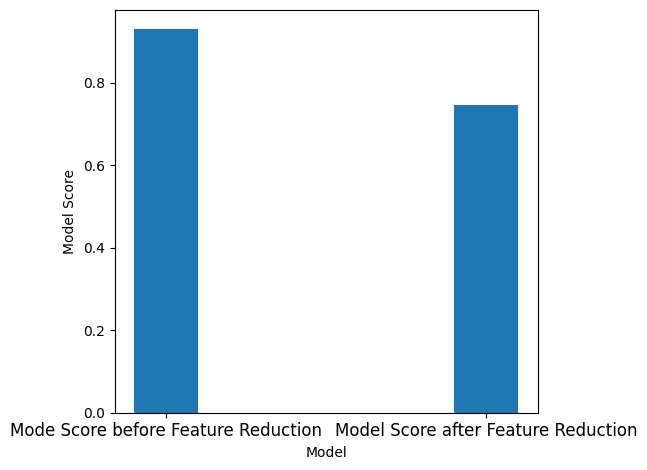

In [ ]:

fig, ax = plt.subplots()
x=["Mode Score before Feature Reduction", "Model Score after Feature Reduction"]
y=[test_score, test_score_pca]
ax.bar(x,y,width=0.2)
ax.set_xlabel('Model')
ax.set_ylabel("Model Score")
ax.set_xticks(["Mode Score before Feature Reduction", "Model Score after Feature Reduction"])
ax.set_xticklabels(["Mode Score before Feature Reduction", "Model Score after Feature Reduction"],fontsize=12)
plt.tight_layout()